In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Set the seed for numpy
np.random.seed(42)

# Set plots style
plt.style.use('seaborn-v0_8')

# Dataset

In [7]:
# import the dataset
df = pd.read_csv('Dataset/leaf.csv',names=['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity','Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness','Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy'])
df.drop('Specimen Number', axis=1, inplace=True)
df.head()

,Class,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [8]:
# Select the columns to be standardized
columns_to_standardize = ['Eccentricity', 'Aspect Ratio', 'Elongation', 'Solidity', 'Stochastic Convexity',
                          'Isoperimetric Factor', 'Maximal Indentation Depth', 'Lobedness', 'Average Intensity',
                          'Average Contrast', 'Smoothness', 'Third moment', 'Uniformity', 'Entropy']

# Create a StandardScaler object
scaler = StandardScaler()


# Fit the scaler to the data and transform the selected columns
std_df = df.copy()
std_df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Data exploration

### Normal data

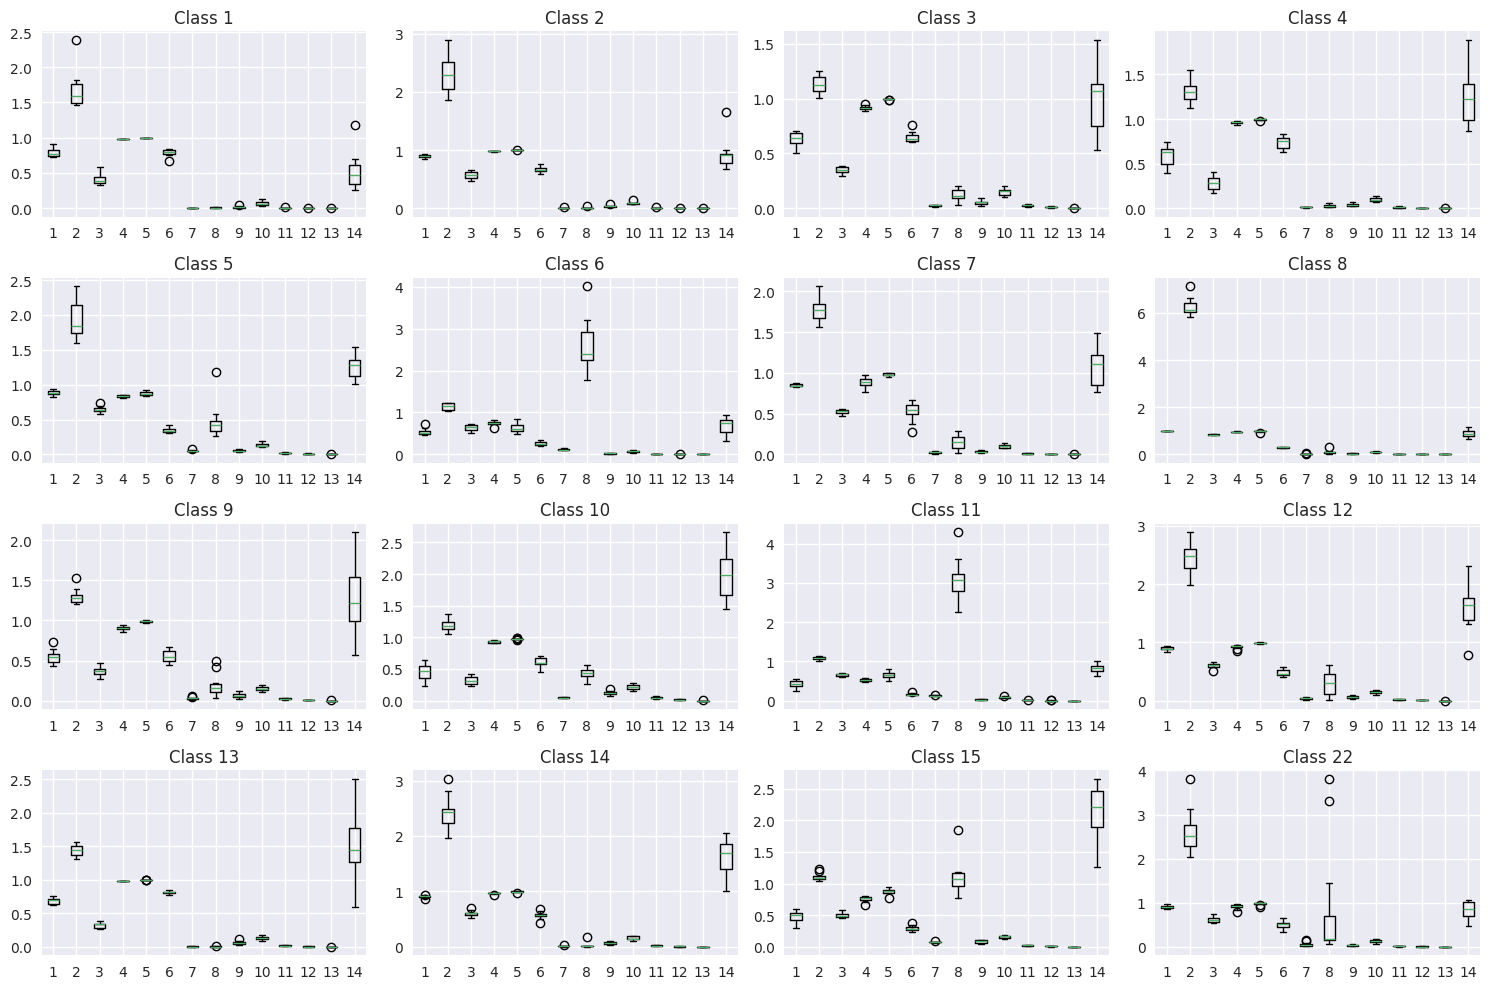

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i == 15:
        i = 21
    class_i_df = df[df['Class'] == i+1]
    ax.boxplot(class_i_df.drop('Class', axis=1).values)
    ax.set_title(f'Class {i+1}')

plt.tight_layout()
plt.show()

### Standardized data

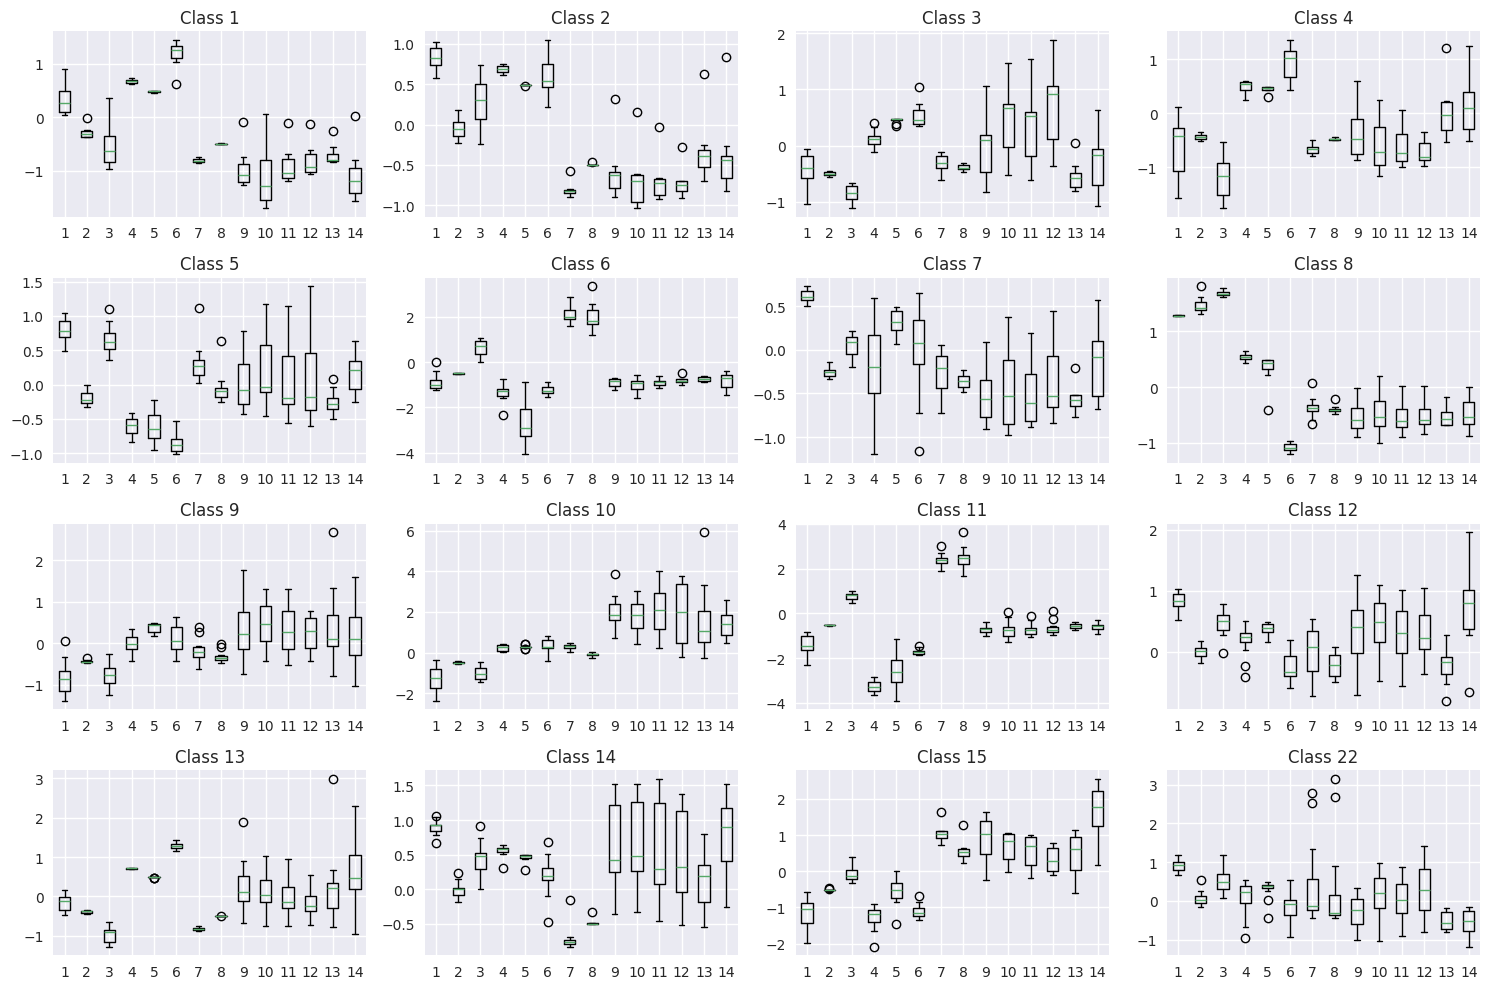

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i == 15:
        i = 21
    class_i_df = std_df[std_df['Class'] == i+1]
    ax.boxplot(class_i_df.drop('Class', axis=1).values)
    ax.set_title(f'Class {i+1}')

plt.tight_layout()
plt.show()

### Correletion Map

<Axes: >

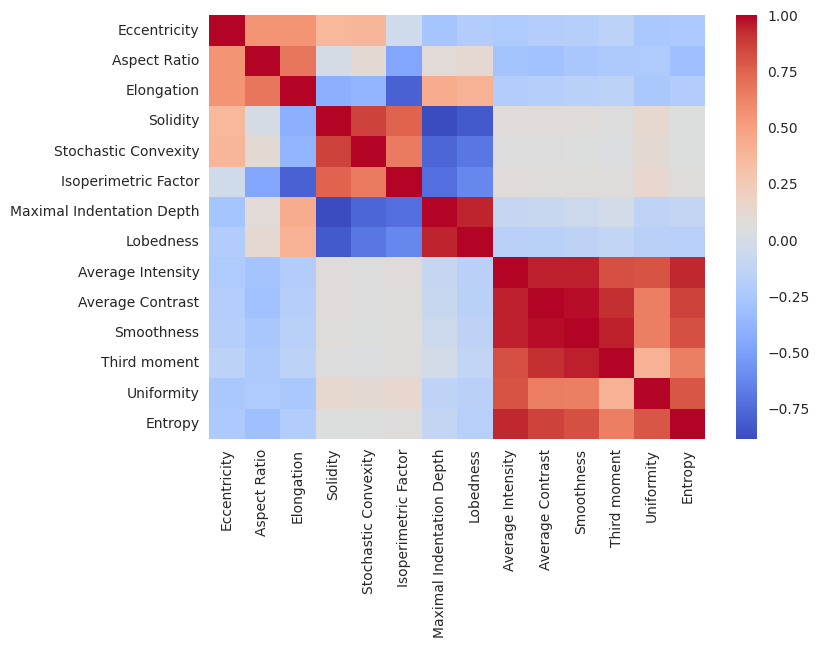

In [11]:
import seaborn as sns

# Exclude the "Class" column from the correlation calculation
correlation_map = df.drop("Class", axis=1).corr()

# Plot the correlation map
sns.heatmap(correlation_map, annot=False, cmap="coolwarm")